In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
import seaborn as sns

plt.rcParams["axes.labelsize"] = 12
plt.rcParams["axes.titlesize"] = 15
# plt.rcParams["figure.titlesize"] = 20
plt.rcParams["figure.figsize"] = (3, 3)


In [2]:
def argmin_alpha(df):
    return (
        df
        .loc[(
            df
            .groupby('kdeg_Ternary')
            .relative_target
            .idxmin()
        )]
        .reset_index()
        [['Kd_T_binary', 'kdeg_Ternary', 'alpha']]
    )
    

# Figure 3
## (a)
% Baseline Target vs. Time by HBF and $kdeg_{Ternary}$

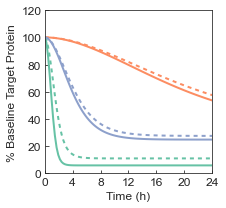

In [11]:
result = pd.read_csv("./saved_objects/deg_vs_time_kdeg_ternary_bpd_ec=0.001_t=24.csv")

result_a = result[['PROTAC', 'kdeg_Ternary', 't', 'relative_target']]

sns.set_style("ticks")

fig, ax = plt.subplots()
sns.lineplot(
    data=result_a,
    x='t',
    y='relative_target',
    hue='PROTAC',
    style='kdeg_Ternary',
    dashes={0:(2,2), 60:''},
    palette='Set2',
    linewidth=2,
    ax=ax
)

# y-axis settings
ax.set_ylabel('% Baseline Target Protein')
ax.set_ylim(0, 120)

# x-axis settings
ax.set_xlabel('Time (h)')
ax.set_xlim(0, 24)
ax.set_xticks(ticks=np.arange(start=0, stop=24 + 1, step=4, dtype=int))

# ticks
ax.tick_params(labelsize=12, direction='in')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().set_visible(False)

plt.savefig(
    "./plots/deg_vs_time_kdeg_ternary_bpd_ec=0.001_t=24.eps",
    bbox_inches="tight", dpi=1200
)


## Legend

In [12]:
legend_fig = plt.figure("Legend", figsize=(1.5,3))

labels[0] = 'HBF'
labels[4] = r'$k_{deg,Ternary}$'
for i in range(5, len(labels)):
    labels[i] = f'{labels[i]}/h'

legend_fig.legend(handles=handles, labels=labels, loc="upper center", fontsize='10')

legend_fig.savefig(
    './plots/deg_vs_time_kdeg_ternary_bpd_ec=0.001_t=24_legend.eps', 
    dpi=1200, bbox_inches='tight'
)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 108x216 with 0 Axes>

## (b)
Total Intracellular HBF Concentration vs. Time by HBF and $kdeg_{Ternary}$

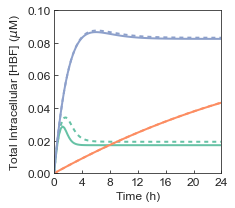

In [13]:
result_b = (
    result[['PROTAC', 'kdeg_Ternary', 't',  'total_bpd_ic']]
    .assign(total_bpd_ic_conc=result.total_bpd_ic/5.24e-13)
)

fig, ax = plt.subplots()
sns.lineplot(
    data=result_b,
    x='t',
    y='total_bpd_ic_conc',
    hue='PROTAC',
    style='kdeg_Ternary',
    dashes={0: (2, 2), 60: ''},
    palette='Set2',
    linewidth=2,
    ax=ax
)

# y-axis settings
ax.set_ylabel(r'Total Intracellular [HBF] ($\mu$M)')
ax.set_ylim(0, 0.1)

# x-axis settings
ax.set_xlabel('Time (h)')
ax.set_xlim(0, 24)
ax.set_xticks(ticks=np.arange(start=0, stop=24 + 1, step=4, dtype=int))

# ticks
ax.tick_params(labelsize=12, direction='in')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().set_visible(False)

plt.savefig(
    "./plots/total_protac_vs_time_kdeg_ternary_bpd_ec=0.001_t=24.eps",
    bbox_inches="tight", dpi=1200
)


# Figure 4
Percentage populations of target protein molecular species vs. Time

In [6]:
cmap = cm.get_cmap('Paired')

def make_species_stackplot(df, figure_title, figure_name):
    labels = [
        'Target',
        'Primed Target',
        'Ternary'
        ]

    fig, (ax, ax2) = plt.subplots(2, 1, sharex='all')  # break y-axis into two portions
    fig.subplots_adjust(hspace=0.15)  # adjust space btwn axes

    ax.stackplot(
        df.t.tolist(),
        df.target,
        df.poly_ub_target,
        df.ternary,
        colors=cmap.colors[:df.shape[1]]
    )
    ax2.stackplot(
        df.t.tolist(),
        df.target,
        df.poly_ub_target,
        df.ternary,
        labels=labels,
        colors=cmap.colors[:df.shape[1]]
    )

    # x-axis 
    ax.set_xlim(0, 24)
    ax2.set_xlim(0, 24)

    # y-axis
    y_break = 94
    ax.set_ylim(y_break, 100)
    ax2.set_ylim(0, y_break)

    # hide the spines between ax and ax2
    ax.spines.bottom.set_visible(False)
    ax2.spines.top.set_visible(False)

    # ticks
    ax.xaxis.tick_top()
    ax2.xaxis.tick_bottom()
    ax.tick_params(labeltop=False)  # don't put tick labels at the top
    plt.setp(ax.get_yticklabels(), fontsize=12)
    plt.setp(ax2.get_yticklabels(), fontsize=12)
    plt.xticks(ticks=np.arange(0, 24 + 1, 4), fontsize=12)

    # cut-out slanted lines
    d = .5  # proportion of vertical to horizontal extent of the slanted line
    kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12, linestyle="none", color='k', mec='k', mew=1, clip_on=False)
    ax.plot([0, 1], [0, 0], transform=ax.transAxes, **kwargs)
    ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

    # Figure Labels
    fig.suptitle(figure_title)
    fig.supxlabel('Time (h)', y=-0.015, fontsize='12')
    fig.supylabel(r"% Target Occupancy", x=-0.05, fontsize='12')

    plt.savefig(figure_name, dpi=1200, bbox_inches="tight")


## (a)
ACBI1 baseline

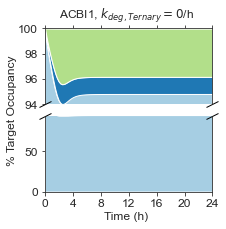

In [9]:
result_a = (
    result
    .loc[(result.PROTAC=='ACBI1') & (result.kdeg_Ternary==0)]
    .assign(
        t=lambda x: x['t'],
        target=lambda x: x.filter(regex='(^T$)|(^.*(?!T_Ub_4)(T_Ub.*))').sum(axis=1) / x['total_target'] * 100,
        poly_ub_target=lambda x: x.filter(regex='(^.*T_Ub_4$)').sum(axis=1) / x['total_target'] * 100,
        ternary=lambda x: x.filter(regex='^Ternary.*').sum(axis=1) / x['total_target'] * 100
    )
)

make_species_stackplot(result_a, r'ACBI1, $k_{deg,Ternary}=0$/h', "./plots/species_vs_time_acbi1_bpd_ec=0.001_t=24.eps")


## Legend

In [135]:
legend_elements = [
    Patch(facecolor=cmap.colors[2], label=r'$\sum_{i=0}^4 T_i\cdot D\cdot E3$'),
    Patch(facecolor=cmap.colors[1], label=r'$T_4 + T_4\cdot D$'),
    Patch(facecolor=cmap.colors[0], label=r'$\sum_{i=0}^3 T_i + T_i\cdot D$')    
]

# Create the legend
legend_fig = plt.figure("Legend", figsize=(1.5, 3))
legend_fig.legend(handles=legend_elements, loc='upper center', fontsize=10)

legend_fig.savefig(
    './plots/species_vs_time_acbi1_bpd_ec=0.001_t=24_legend.eps',
    dpi=1200, bbox_inches='tight'
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 108x216 with 0 Axes>

## (b)
PROTAC $1^*$ baseline

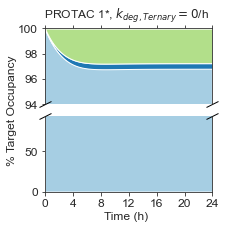

In [10]:
result_b = (
    result
    .loc[(result.PROTAC == 'PROTAC 1*') & (result.kdeg_Ternary == 0)]
    .assign(
        t=lambda x: x['t'],
        target=lambda x: x.filter(
            regex='(^T$)|(^.*(?!T_Ub_4)(T_Ub.*))').sum(axis=1) / x['total_target'] * 100,
        poly_ub_target=lambda x: x.filter(
            regex='(^.*T_Ub_4$)').sum(axis=1) / x['total_target'] * 100,
        ternary=lambda x: x.filter(
            regex='^Ternary.*').sum(axis=1) / x['total_target'] * 100
    )
)

make_species_stackplot(result_b, r'PROTAC 1*, $k_{deg,Ternary}=0$/h', "./plots/species_vs_time_protac1_star_bpd_ec=0.001_t=24.eps")

## (c)
ACBI1 where $kdeg_{Ternary} = 60/h$

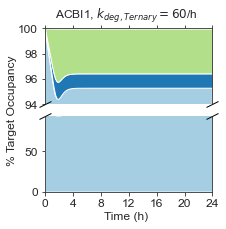

In [12]:
result_c = (
    result
    .loc[(result.PROTAC == 'ACBI1') & (result.kdeg_Ternary == 60)]
    .assign(
        t=lambda x: x['t'],
        target=lambda x: x.filter(
            regex='(^T$)|(^.*(?!T_Ub_4)(T_Ub.*))').sum(axis=1) / x['total_target'] * 100,
        poly_ub_target=lambda x: x.filter(
            regex='(^.*T_Ub_4$)').sum(axis=1) / x['total_target'] * 100,
        ternary=lambda x: x.filter(
            regex='^Ternary.*').sum(axis=1) / x['total_target'] * 100
    )
)

make_species_stackplot(result_c, r'ACBI1, $k_{deg,Ternary}=60$/h', "./plots/species_vs_time_acbi1_kdeg_ternary=60_bpd_ec=0.001_t=24.eps")

## (d)
PROTAC $1^*$ where $kdeg_{Ternary} = 60/h$

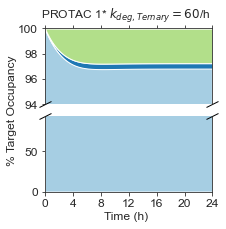

In [14]:
result_d = (
    result
    .loc[(result.PROTAC == 'PROTAC 1*') & (result.kdeg_Ternary == 60)]
    .assign(
        t=lambda x: x['t'],
        target=lambda x: x.filter(
            regex='(^T$)|(^.*(?!T_Ub_4)(T_Ub.*))').sum(axis=1) / x['total_target'] * 100,
        poly_ub_target=lambda x: x.filter(
            regex='(^.*T_Ub_4$)').sum(axis=1) / x['total_target'] * 100,
        ternary=lambda x: x.filter(
            regex='^Ternary.*').sum(axis=1) / x['total_target'] * 100
    )
)

make_species_stackplot(result_d, r'PROTAC 1* $k_{deg,Ternary}=60$/h', "./plots/species_vs_time_protac1_star_kdeg_ternary=60_bpd_ec=0.001_t=24.eps")

# Figure 6
% Baseline Target Protein, Ternary Complex, Total Intracellular PROTAC vs. Extracellular PROTAC

In [30]:
def make_deg_ternary_protac_plot(df, vol_ic, figure_title, figure_name):
    plt.rcParams["figure.figsize"] = (3, 6)
    plt.rcParams["xtick.direction"] = 'in'
    plt.rcParams["xtick.labelsize"] = 12
    plt.rcParams["ytick.direction"] = 'in'
    plt.rcParams["ytick.labelsize"] = 12
    plt.rcParams["figure.titlesize"] = 15
    # convert amounts to concentrations
    result = (
        df
        [[
            'PROTAC',
            'initial_BPD_ec_conc',
            'relative_target',
            'total_ternary',
            'total_bpd_ic'
        ]]
        .assign(
            total_ternary=lambda x: x.total_ternary / vol_ic,
            total_bpd_ic=lambda x: x.total_bpd_ic / vol_ic
        )
        .rename(columns={
            'relative_target': 'Degradation',
            'total_ternary': 'Ternary complex',
            'total_bpd_ic': 'Intracellular PROTAC'
        })
    )
    # degradation data
    result_deg = result.melt(
        id_vars=['PROTAC', 'initial_BPD_ec_conc'], 
        value_vars=['Degradation']
    )
    # ternary formation data
    result_ternary = result.melt(
        id_vars=['PROTAC', 'initial_BPD_ec_conc'], 
        value_vars=['Ternary complex']
    )
    # intracellular PROTAC data
    result_protac = result.melt(
        id_vars=['PROTAC', 'initial_BPD_ec_conc'], 
        value_vars=['Intracellular PROTAC']
    )

    sns.set_style("ticks")

    fig, (ax1, ax2) = plt.subplots(2, 1, sharex='all')

    # degradation curves
    p = sns.lineplot(
        data=result_deg,
        x='initial_BPD_ec_conc',
        y='value',
        hue='PROTAC',
        palette='Set2',
        linewidth=2,
        ax=ax1,
        legend=False
    )

    # y-axis settings
    ax1.set_ylim(bottom=0, top=120)
    ax1.set_ylabel('% Baseline Target Protein', labelpad=15)
    
    # ternary complex formation curves
    q = sns.lineplot(
        data=result_ternary,
        x='initial_BPD_ec_conc',
        y='value',
        hue='PROTAC',
        palette='Set2',
        linewidth=2,
        ax=ax2,
        legend=False
    )

    # x-axis settings
    ax2.set_xlabel(r'Extracellular [HBF] ($\mu$M)')

    # y-axis settings
    ax2.set_ylim(bottom=0, top=0.012)
    ax2.set_yticks([0.002 * i for i in range(5 + 1)])
    ax2.set_ylabel(r'[Ternary Complex] ($\mu$M)')

    # create another Axes with shared x-axis
    ax3 = ax2.twinx()

    r = sns.lineplot(
        data=result_protac,
        x='initial_BPD_ec_conc',
        y='value',
        hue='PROTAC',
        palette='Set2',
        linewidth=2,
        ax=ax3,
        linestyle='--',
        legend=False
    )

    # y-axis settings
    ax3.set_yscale('log')
    ax3.set_ylim(result['initial_BPD_ec_conc'].min(), result['initial_BPD_ec_conc'].max())
    ax3.set_yticks(np.power(10, np.arange(-4, 2 + 1, dtype=float)))
    ax3.set_ylabel(r'Total Intracellular [HBF] ($\mu$M)')

    # figure-level x-axis settings
    plt.xscale('log')
    plt.xlim(result['initial_BPD_ec_conc'].min(), result['initial_BPD_ec_conc'].max())
    plt.xticks(np.power(10, np.arange(-4, 2 + 1, dtype=float)))

    # fig.tight_layout()
    plt.subplots_adjust(hspace=0)

    #
    plt.suptitle(figure_title)

    plt.savefig(f"./plots/{figure_name}", dpi=1200, bbox_inches="tight")



## (a)
ACBI1 and PROTAC 1 with $kdeg_{Ternary} = 60/h$

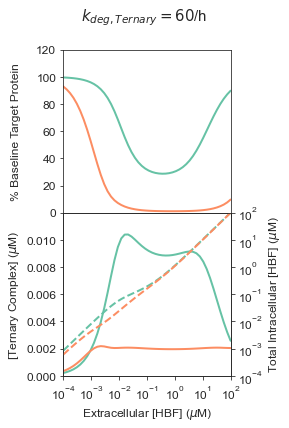

In [31]:
v_ic = 5.24e-13

result_a = pd.read_csv("./saved_objects/deg_ternary_protac_vs_protac_high_kdeg_ternary_t=6.csv")

make_deg_ternary_protac_plot(
    result_a, v_ic, r'$k_{deg,Ternary}=60$/h', "deg_ternary_protac_vs_protac_high_kdeg_ternary_t=6.eps")


## (b)
ACBI1 and PROTAC 1 baseline

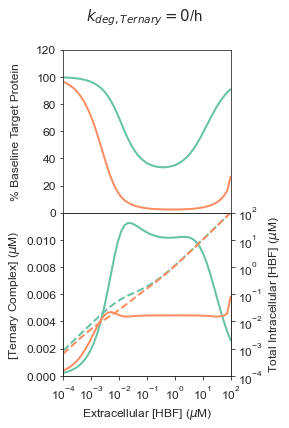

In [32]:
result_b = pd.read_csv("./saved_objects/PROTAC1&ACBI1_target=1_e3=0.1_t=6.csv")

make_deg_ternary_protac_plot(
    result_b, v_ic, r'$k_{deg,Ternary}=0$/h', "deg_ternary_protac_vs_protac_t=6.eps")


## Legend

In [181]:
set2 = cm.get_cmap('Set2')

legend_elements = [
    Line2D([], [], color='none', label='HBF'),
    Patch(facecolor=set2.colors[1], label='ACBI1'),
    Patch(facecolor=set2.colors[0], label='PROTAC 1'),
    Line2D([], [], color='none', label='Species'),
    Line2D([0], [0], ls='-', label=r'$\sum T_i\cdot D\cdot E3$', color='black'),
    Line2D([0], [0], ls='--', label=r'$D_{ic}\cdot *$', color='black')
]

# Create the legend
legend_fig = plt.figure("Legend", figsize=(1.5, 3))
legend_fig.legend(handles=legend_elements, loc='upper center', fontsize=10)

legend_fig.savefig(
    './plots/deg_ternary_protac_vs_protac_t=6_legend.eps',
    dpi=1200, bbox_inches='tight'
)


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 108x216 with 0 Axes>

# Figure 7


In [20]:
def make_kd_vs_alpha_plot(df, figure_title, figure_name):
    plt.rcParams["axes.labelsize"] = 12
    plt.rcParams["figure.figsize"] = (3, 3)
    plt.rcParams["axes.titlesize"] = 15 
    
    alpha_range = df['alpha'].unique()
    bpd_ec = df['initial_BPD_ec_conc'].unique()[0]

    result = (
        df
        [[
            'relative_target', 
            'relative_all_ternary', 
            'alpha', 
            'Kd_T_binary'
        ]]
        .astype({'Kd_T_binary': 'category'})
        .rename(columns={
            'relative_target': 'Degradation', 
            'relative_all_ternary': 'Ternary'
        })
        .melt(id_vars=['alpha', 'Kd_T_binary'])
    )

    sns.set_style("whitegrid")
    fig, ax = plt.subplots()
    p = sns.lineplot(
        data=result,
        x='alpha',
        y='value',
        hue='Kd_T_binary',
        style='variable',
        palette='brg_r',
        linewidth=1.25,
        ax=ax,
        legend=False
    )

    plt.xscale('log')
    plt.xlim(alpha_range.min(), alpha_range.max())
    plt.ylim(0, 120)
    plt.xlabel(r'Cooperativity $\alpha$')
    plt.ylabel('% Baseline Target Protein')
    plt.title(figure_title)

    plt.savefig(f"plots/{figure_name}", bbox_inches='tight', dpi=1200)


## (a)

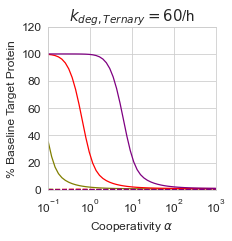

In [21]:
result_a = pd.read_csv('./saved_objects/deg_vs_alpha_by_kd_high_kdeg_ternary.csv')
result_a = result_a.loc[result_a['Kd_T_binary'] != 100]

make_kd_vs_alpha_plot(
    result_a, r'$k_{deg,Ternary}=60$/h', 'kd_vs_alpha_high_kdeg_ternary.eps')


## (b)


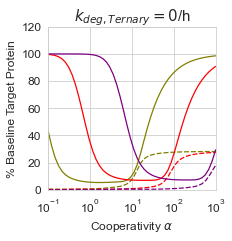

In [22]:
result_b = pd.read_csv("./saved_objects/ACBI1_bpd_ec=0.001_t=6_kd_T_binary_vs_alpha.csv")
result_b = result_b.loc[result_b['Kd_T_binary'] != 100]

make_kd_vs_alpha_plot(result_b, r'$k_{deg,Ternary}=0$/h', 'kd_vs_alpha.eps')


## Legend

In [204]:
pal = sns.color_palette('brg_r')
pal_hex = pal.as_hex()

legend_elements = [
    Line2D([0], [0], ls='-', label=r'$K_D = 0.1$ $\mu$M', color=pal_hex[1]),
    Line2D([0], [0], ls='-', label=r'$K_D = 1$ $\mu$M', color=pal_hex[3]),
    Line2D([0], [0], ls='-', label=r'$K_D = 10$ $\mu$M', color=pal_hex[5])
]

# Create the legend
legend_fig = plt.figure("Legend", figsize=(1.5, 3))
legend_fig.legend(handles=legend_elements, loc='upper center', fontsize=10)

legend_fig.savefig(
    './plots/kd_vs_alpha_legend.eps',
    dpi=1200, bbox_inches='tight'
)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


<Figure size 108x216 with 0 Axes>

# Figure 9

## (b)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


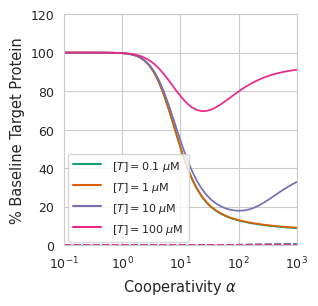

In [21]:
plt.rcParams["axes.labelsize"] = 10.5
plt.rcParams["figure.figsize"] = (3, 3)

E3 = 0.1
protac_id = 'ACBI1'
t_eval = 6  # time point at which to calculate
initial_BPD_ec_conc = 0.001  # initial concentrations of BPD_ec (uM)
k_deub = 10
k_deg = 20

test_id = protac_id.replace(" ", "") + f"_bpd_ec={initial_BPD_ec_conc}_t={t_eval}_E3={E3}uM_kdeub={k_deub}_kdeg={k_deg}"
result_id = f"{test_id}_kprod_vs_alpha_across_T"

result = pd.read_csv(f"./saved_objects/{result_id}.csv")
alpha_range = result['alpha'].unique()
bpd_ec = result['initial_BPD_ec_conc'].unique()[0]

result = result[['relative_target', 'relative_all_ternary', 'alpha', 'Conc_T_base']]
result = result.rename(columns={'relative_target': 'Degradation', 'relative_all_ternary': 'Ternary'})
result = result.melt(id_vars=['alpha', 'Conc_T_base'])

pal = sns.color_palette('Set2')
pal_hex = pal.as_hex()

sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.lineplot(
    data=result,
    x='alpha',
    y='value',
    hue='Conc_T_base',
    style='variable',
    palette='Dark2',
    linewidth=1.25,
    ax=ax
)
ax.tick_params(labelsize=9)

plt.xscale('log')
plt.xlim(alpha_range.min(), alpha_range.max())
plt.ylim(0, 120)
plt.xlabel(r'Cooperativity $\alpha$',)
plt.ylabel('% Baseline Target Protein',)

handles, labels = ax.get_legend_handles_labels()
# labels[0] = "Initial [Target]"
for i in range(1,5):
    target_conc = float(labels[i])
    if target_conc.is_integer():
        target_conc = int(target_conc)
    labels[i] = fr"$[T] = {str(target_conc)}$" + r" $\mu$M"
labels[5] = ""
ax.legend(handles=handles[1:5], labels=labels[1:5], loc='lower left', borderaxespad=0.25)
plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15')  # for legend title
plt.savefig(f"plots/{result_id}.eps", bbox_inches="tight", dpi=1200)
plt.show()

# Figure 9.1

Degradation at $t = 6$ h at different $[T]_0 / [E3]_0$ where $k_{deg,T} = k_{deg,Ternary}$ and 
$[E3]_0 = 1.0 \mu M$

In [17]:
protac_id = 'ACBI1'
t = 6
bpd_ec = 0.001
e3 = 1
result_id = f"{protac_id}_bpd_ec={bpd_ec}_t={t}_E3={e3}uM_kprod_vs_alpha"

result = pd.read_csv(f"./saved_objects/{result_id}.csv")
alpha_range = result['alpha'].unique()

result = (
    result
    [[
        'relative_target', 
        'relative_all_ternary', 
        'alpha', 
        'Conc_T_base'
    ]]
    .rename(columns={'relative_target': 'Degradation', 'relative_all_ternary': 'Ternary'})
    .assign(ratio = lambda x: round(x.Conc_T_base / e3, 2))
    .melt(id_vars=['alpha', 'ratio'], value_vars=['Degradation', 'Ternary'])
)

result.shape

(500, 4)

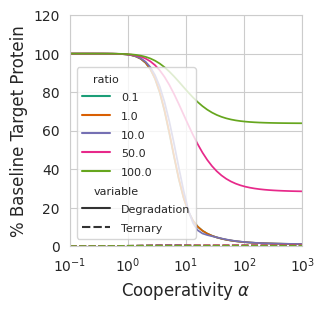

In [18]:
pal = sns.color_palette('Set2')
pal_hex = pal.as_hex()

sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.lineplot(
    data=result,
    x='alpha',
    y='value',
    hue='ratio',
    style='variable',
    palette='Dark2',
    linewidth=1.25,
    ax=ax
)
# p.tick_params(labelsize=15)
plt.xscale('log')
plt.xlim(alpha_range.min(), alpha_range.max())
plt.ylim(0, 120)
plt.xlabel(r'Cooperativity $\alpha$')
plt.ylabel('% Baseline Target Protein')

handles, labels = ax.get_legend_handles_labels()
# labels[0] = "Initial [Target]"
# for i in range(1,5):
#     target_conc = float(labels[i])
#     if target_conc.is_integer():
#         target_conc = int(target_conc)
#     labels[i] = fr"$[T] = {str(target_conc)}$" + r" $\mu$M"
# labels[5] = ""
# ax.legend(handles=handles[1:5], labels=labels[1:5], loc='lower left', borderaxespad=0.25)
plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15')  # for legend title
plt.savefig(f"plots/{result_id}.png", bbox_inches="tight", dpi=1200)
plt.show()


$[E3]_0 = 0.1 \mu M$

In [8]:
protac_id = 'ACBI1'
t = 6
bpd_ec = 0.001
e3 = 0.1
k_deub = 60
k_deg = 60
result_id = f"{protac_id}_bpd_ec={bpd_ec}_t={t}_E3={e3}uM_kdeub={k_deub}_kdeg={k_deg}_kprod_vs_alpha_across_T"

result = pd.read_csv(f"./saved_objects/{result_id}.csv")
alpha_range = result['alpha'].unique()

result = (
    result
    [[
        'relative_target', 
        'relative_all_ternary', 
        'alpha', 
        'Conc_T_base'
    ]]
    .rename(columns={'relative_target': 'Degradation', 'relative_all_ternary': 'Ternary'})
    .assign(ratio = lambda x: round(x.Conc_T_base / e3, 1))
    .melt(id_vars=['alpha', 'ratio'], value_vars=['Degradation', 'Ternary'])
)

result.shape

(300, 4)

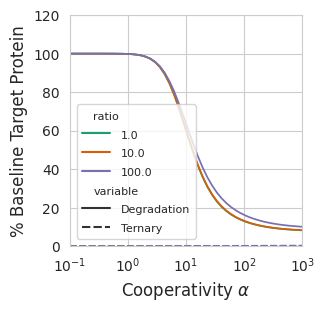

In [9]:
pal = sns.color_palette('Set2')
pal_hex = pal.as_hex()

sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.lineplot(
    data=result,
    x='alpha',
    y='value',
    hue='ratio',
    style='variable',
    palette='Dark2',
    linewidth=1.25,
    ax=ax
)
# p.tick_params(labelsize=15)
plt.xscale('log')
plt.xlim(alpha_range.min(), alpha_range.max())
plt.ylim(0, 120)
plt.xlabel(r'Cooperativity $\alpha$')
plt.ylabel('% Baseline Target Protein')

handles, labels = ax.get_legend_handles_labels()
# labels[0] = "Initial [Target]"
# for i in range(1,5):
#     target_conc = float(labels[i])
#     if target_conc.is_integer():
#         target_conc = int(target_conc)
#     labels[i] = fr"$[T] = {str(target_conc)}$" + r" $\mu$M"
# labels[5] = ""
# ax.legend(handles=handles[1:5], labels=labels[1:5], loc='lower left', borderaxespad=0.25)
plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='15')  # for legend title
plt.savefig(f"plots/{result_id}.png", bbox_inches="tight", dpi=1200)
plt.show()


# Figure 11
## (a)
% Baseline Target Protein vs $\alpha$ at $k_{deg,Ternary}$ = {0, $k_{deg, T} / 32$, $k_{deg,T} / 16$, and $k_{deg,T}$} for $K_{D, binary, T} = 0.05 \mu M$.

In [191]:
results = pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.05_kdeg_ternary_vs_alpha.csv")

results_a = (
    results
    .loc[results.kdeg_Ternary.isin([0, 60/32, 60/64, 60])]
    [['relative_target', 'alpha', 'kdeg_Ternary']]
    .astype({'kdeg_Ternary': str})
)

results_a.shape

(600, 3)

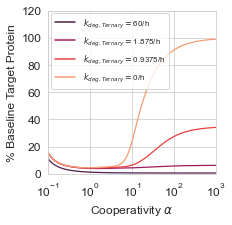

In [193]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.lineplot(
    data=results_a,
    x='alpha',
    y='relative_target',
    hue='kdeg_Ternary',
    palette='rocket',
    linewidth=1.25,
    ax=ax
)
p.tick_params(labelsize=12)
plt.xscale('log')
plt.ylim(0, 120)
plt.xlim(0.1, 1000)
plt.ylabel('% Baseline Target Protein')
plt.xlabel(r'Cooperativity $\alpha$')

# plt.xticks([0] + [2 ** i for i in range(-4, 7, 2)])
# plt.yticks([10 ** i for i in range(-1, 4)])

handles, labels = ax.get_legend_handles_labels()
for i in range(4):
    label_value = float(labels[i])
    if label_value.is_integer():
        label_value = int(label_value)
    labels[i] = r'$k_{deg,Ternary} = $' + f'{label_value}/h'  
    
ax.legend(handles=handles, labels=labels, loc='upper left', borderaxespad=0.25)
plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text

plt.savefig("./plots/deg_vs_alpha_across_kdeg_ternary_kd=0.05.png", bbox_inches='tight', dpi=1200)


## (b)
Optimal $\alpha$ vs $k_{deg,Ternary}$ at $K_{D,binary,T} = 0.1, 0.05, 0.01 \mu M$

In [196]:
results = pd.concat(
    [
        argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.1_kdeg_ternary_vs_alpha.csv"))
        ,argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.05_kdeg_ternary_vs_alpha.csv"))
        ,argmin_alpha(pd.read_csv("./saved_objects/ACBI1_t=6_kd=0.01_kdeg_ternary_vs_alpha.csv"))
    ]
)

results_b = (
    results
    .assign(ratio_kdeg=results.kdeg_Ternary / 60)
    .loc[results.alpha < 1000]
    .astype({'Kd_T_binary': str})
)
results_b.shape

(22, 4)

In [197]:
results_b.columns

Index(['Kd_T_binary', 'kdeg_Ternary', 'alpha', 'ratio_kdeg'], dtype='object')

In [198]:
(
    results_b
    [['Kd_T_binary', 'kdeg_Ternary', 'alpha']]
    .head()
)

,Kd_T_binary,kdeg_Ternary,alpha
0,0.1,0.000000,1.717510
1,0.1,0.058594,1.717510
2,0.1,0.117188,1.717510
3,0.1,0.234375,1.827027
4,0.1,0.468750,1.943527


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


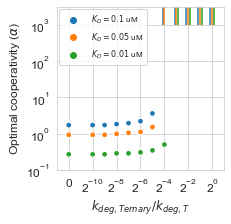

In [214]:
sns.set_style("whitegrid")
fig, ax = plt.subplots()
p = sns.scatterplot(
    data=results_b,
    x='ratio_kdeg',
    y='alpha',
    hue='Kd_T_binary',
    palette='tab10',
    linewidth=1.25,
    ax=ax
)
p.tick_params(labelsize=12)
plt.xscale('symlog', base=2, linthresh=2**-10)
plt.yscale('log')
plt.xlim(-2**-11, 2)
plt.ylim(0.1, 10**3.5)
plt.ylabel(r'Optimal cooperativity ($\alpha$)')
plt.xlabel(r'$k_{deg,Ternary} / k_{deg,T}$')

plt.xticks([0] + [(2 ** -i) for i in range(0, 11, 2)])
plt.yticks([10 ** i for i in range(-1, 4)])

handles, labels = ax.get_legend_handles_labels()
for i in range(3):
    kd = float(labels[i])
    if kd.is_integer():
        kd = int(kd)
    labels[i] = fr"$K_D = {kd}$ uM"

ax.legend(handles=handles, labels=labels,
          loc='upper left', borderaxespad=0.25)

ax.stem([(2 ** i )*0.9 for i in range(-4, 1)], [10**3 for _ in range(-4, 1)], linefmt='tab:blue', bottom=10**4, markerfmt=' ')
ax.stem([(2 ** i ) for i in range(-4, 1)], [10**3 for _ in range(-4, 1)], linefmt='tab:orange', bottom=10**4, markerfmt=' ')
ax.stem([(2 ** i )*1.1 for i in range(-3, 1)], [10**3 for _ in range(-3, 1)], linefmt='tab:green', bottom=10**4, markerfmt=' ')

plt.setp(ax.get_legend().get_texts(), fontsize='8')  # for legend text

plt.savefig("./plots/optimal_alpha_vs_kdeg_ternary_v2.eps", bbox_inches='tight', dpi=1200)


# Degradation over Time across ACBI1 WT and Mutants

### Plot

In [33]:
result = pd.read_csv("./saved_objects/deg_vs_time_nanobret_bpd_ec=0.001_t=6.csv")

In [ ]:

result_a = (
    result
    [[
        'relative_target', 
        'relative_all_ternary', 
        't', 
        'PROTAC'
    ]]
    .rename(columns={
        'relative_target': 'Degradation', 
        'relative_all_ternary': 'Ternary'
    })
    .melt(id_vars=['PROTAC', 't'])
)

sns.set_style("ticks")

fig, ax = plt.subplots()
sns.lineplot(
    data=result_a,
    x='t',
    y='value',
    hue='PROTAC',
    style='variable',
    palette='Set2',
    linewidth=2,
    ax=ax
)

# y-axis settings
ax.set_ylabel('% Baseline Target Protein')
ax.set_ylim(0, 120)

# x-axis settings
ax.set_xlabel('Time (h)')
ax.set_xlim(0, 6)
ax.set_xticks(ticks=np.arange(start=0, stop=6 + 1, step=1, dtype=int))

# ticks
ax.tick_params(labelsize=12, direction='in')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().set_visible(False)

plt.savefig(
    "./plots/deg_vs_time_nanobret_bpd_ec=0.001_t=6.png",
    bbox_inches="tight", dpi=1200
)

plt.show()


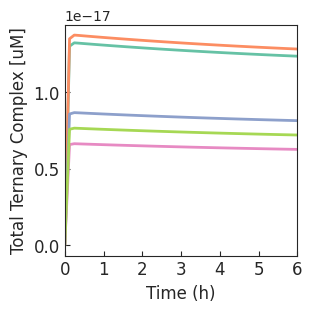

In [34]:
result_b = (
    result
    [[
        'total_ternary', 
        't', 
        'PROTAC'
    ]]
    
)

sns.set_style("ticks")

fig, ax = plt.subplots()
sns.lineplot(
    data=result_b,
    x='t',
    y='total_ternary',
    hue='PROTAC',
    palette='Set2',
    linewidth=2,
    ax=ax
)

# y-axis settings
ax.set_ylabel('Total Ternary Complex [uM]')

# x-axis settings
ax.set_xlabel('Time (h)')
ax.set_xlim(0, 6)
ax.set_xticks(ticks=np.arange(start=0, stop=6 + 1, step=1, dtype=int))

# ticks
ax.tick_params(labelsize=12, direction='in')

# legend
handles, labels = ax.get_legend_handles_labels()
ax.get_legend().set_visible(False)

# plt.savefig(
#     "./plots/deg_vs_time_nanobret_bpd_ec=0.001_t=6.png",
#     bbox_inches="tight", dpi=1200
# )

plt.show()


### Legend

In [ ]:
legend_fig = plt.figure("Legend", figsize=(1.5,3))

labels[0] = 'HBF'
labels[4] = r'$k_{deg,Ternary}$'
for i in range(5, len(labels)):
    labels[i] = f'{labels[i]}/h'

legend_fig.legend(handles=handles, labels=labels, loc="upper center", fontsize='10')

legend_fig.savefig(
    './plots/deg_vs_time_kdeg_ternary_bpd_ec=0.001_t=24_legend.eps', 
    dpi=1200, bbox_inches='tight'
)


In [13]:
result = pd.read_csv("./saved_objects/deg_vs_time_nanobret_bpd_ec=0.001_t=12.csv")

In [14]:
(
    result
    [['PROTAC', 't', 'relative_target']]
    .pivot(index='PROTAC', columns='t', values='relative_target')
)

t,0,6,12
PROTAC,,,
E1420S,100.0,76.183128,67.110273
L1465S,100.0,81.466903,73.712966
R69Q,100.0,84.483550,77.657497
WT,100.0,76.607810,67.626674
Y112F,100.0,82.888207,75.555498
